In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
import seaborn as sns
from scipy import stats
from scipy import signal

In [2]:
# Pathways
source = r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Centroids_Trimmed"
figpath = r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Figures"

In [3]:
csv_list = glob.glob(source + '/*_*.csv')
print(len(csv_list))

17


In [4]:
def Tortuosity(x, time):
    
    
    t = time/100
    
    Nx = len(x)  #number of points
    Nt = Nx
    Time = t[-1]-t[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
 
    meanx = np.mean(x)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftx = fft(x-meanx)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  

    
    return xf, Nx, fftx

Sham_1_12_35598 16.264497733915526
Experimental_7_4_54607 11.598419810367913
Experimental_7_1_36846 16.919756209353498
Sham_15_8_47701 18.103907023889814
Sham_6_0_83460 13.404084185739023
Sham_1_11_33803 20.95557819041205
Experimental_7_3_41552 13.863883306186056
Sham_3_0_77208 8.208399602224475
Experimental_4_1_72340 34.62260725357787
Sham_7_0_63837 12.298308255891996


/Users/Mahad/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Experimental_7_0_36526 9.682698182050604
Sham_1_13_37142 11.541263123981388
Sham_1_14_38514 17.415956890681873
Experimental_1_0_52688 12.163789317966062
Experimental_7_2_40443 13.18200109603547
Sham_1_10_31980 15.731015102284275
Sham_7_1_64994 6.653083981564487


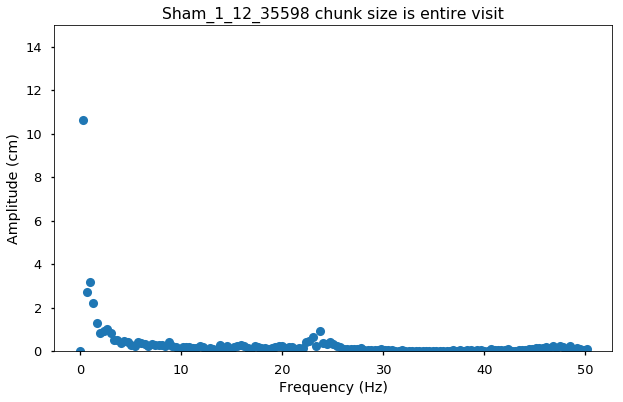

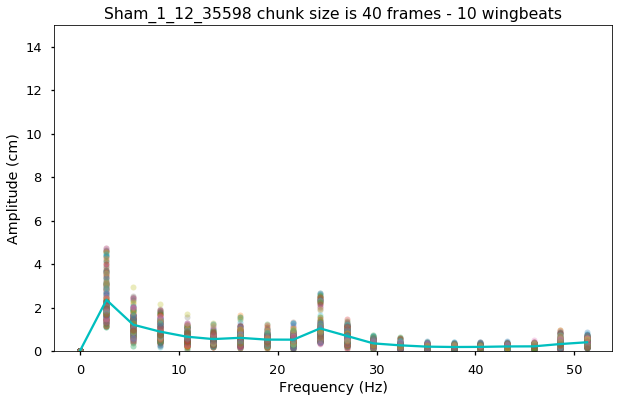

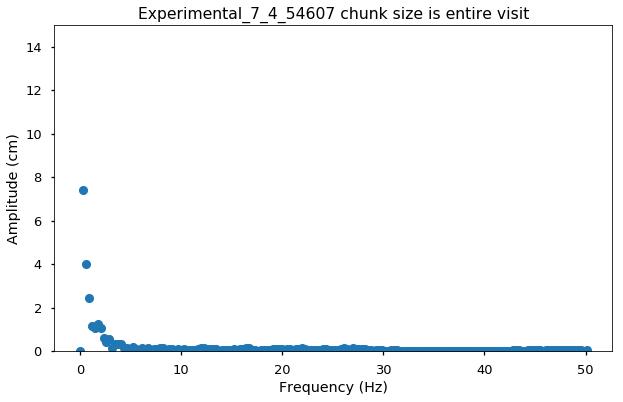

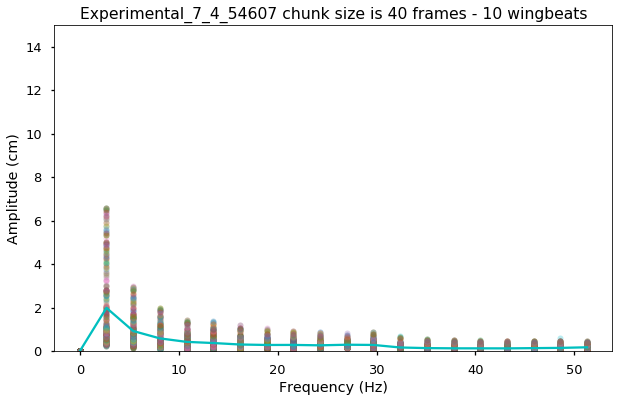

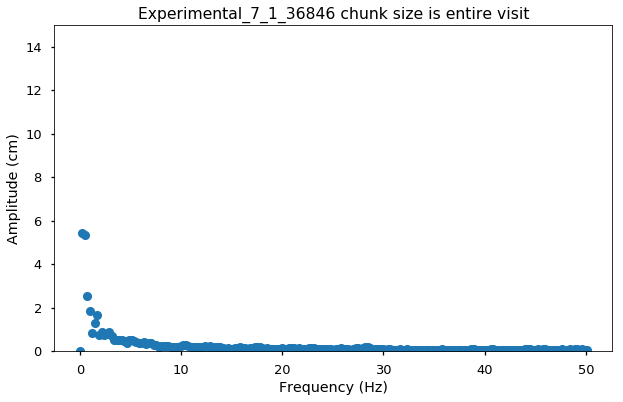

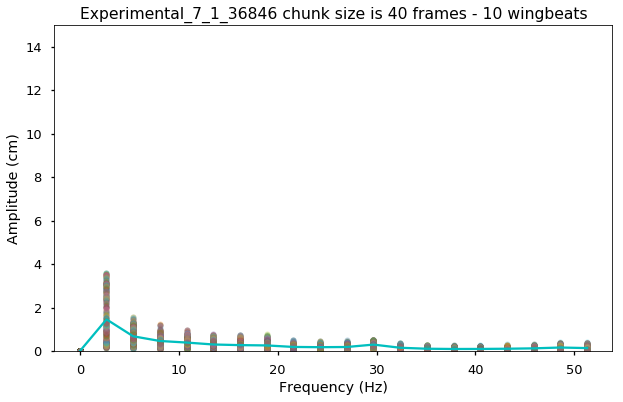

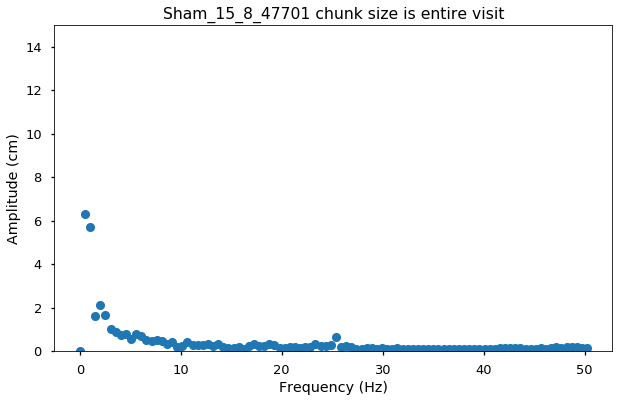

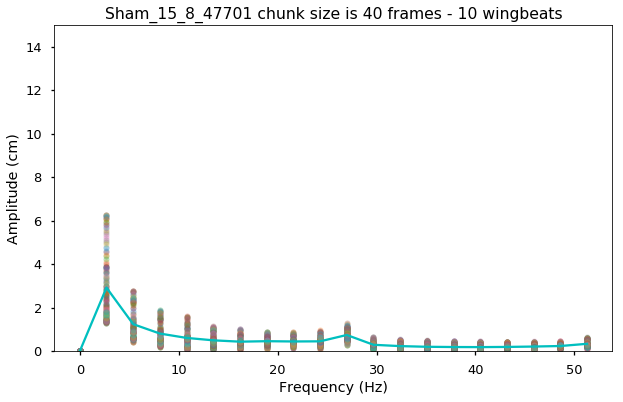

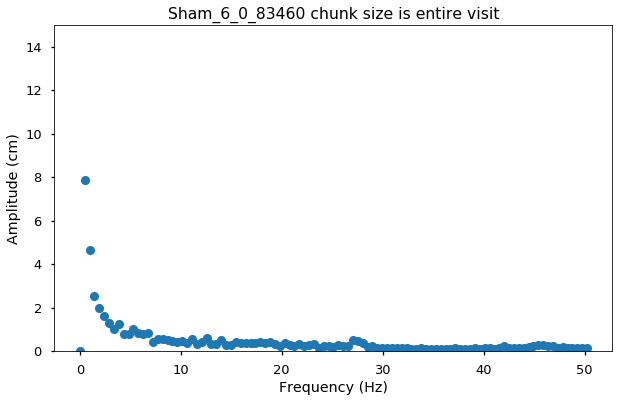

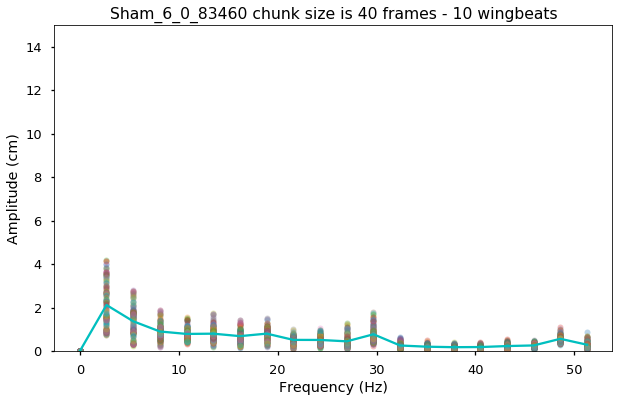

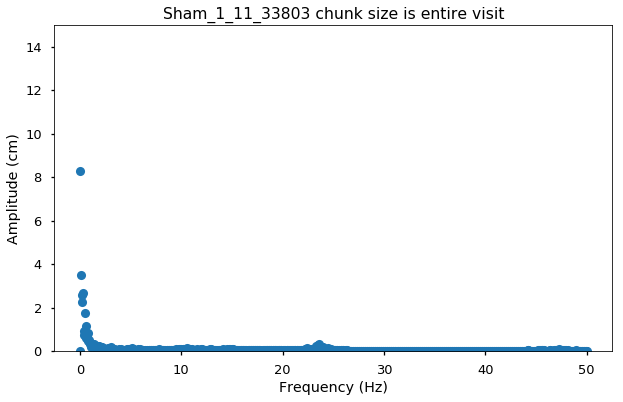

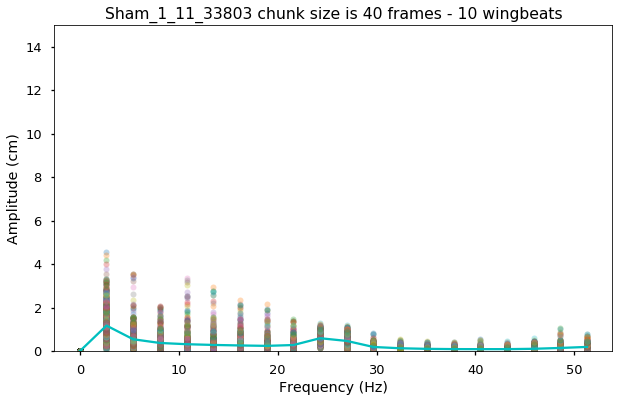

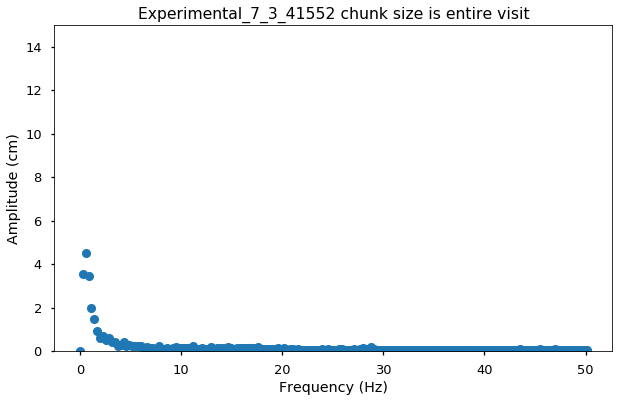

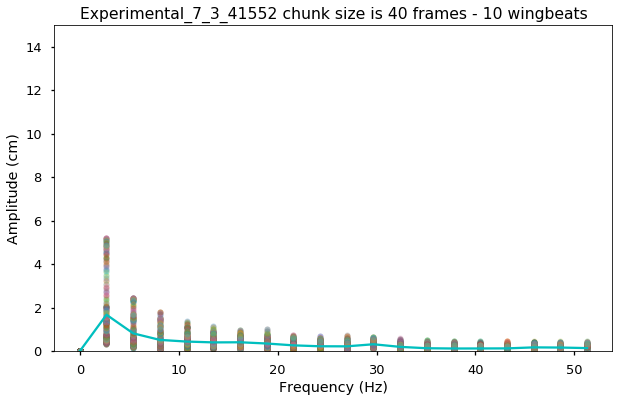

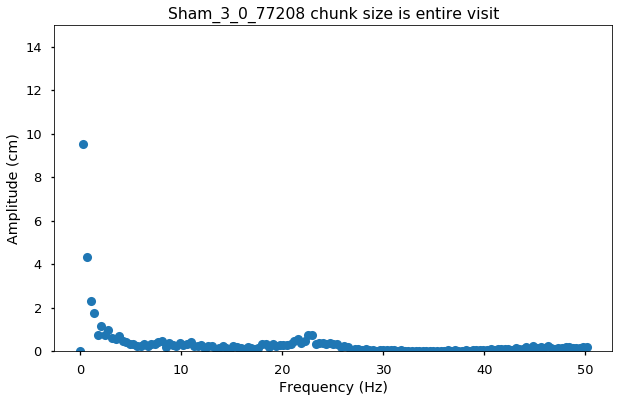

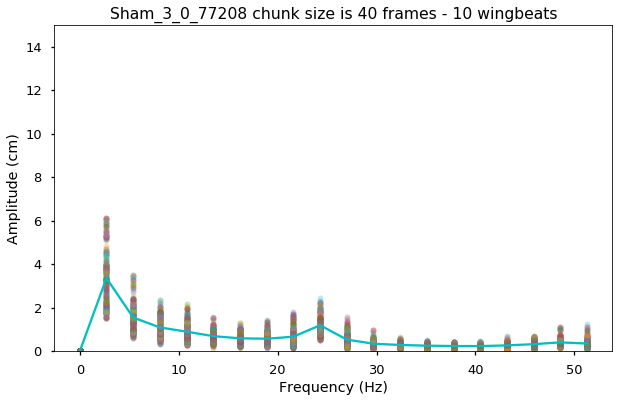

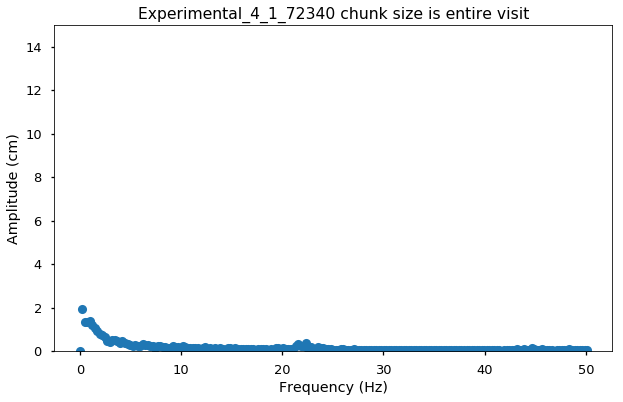

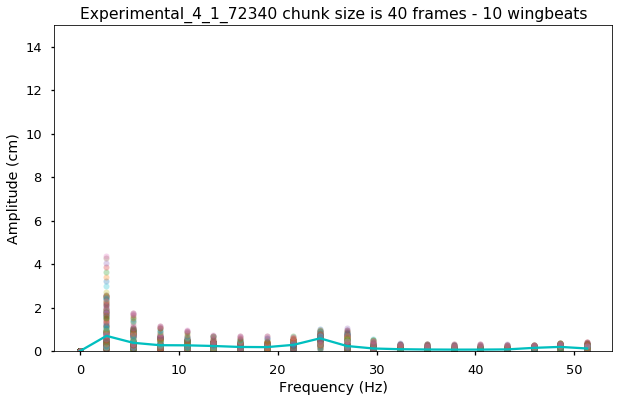

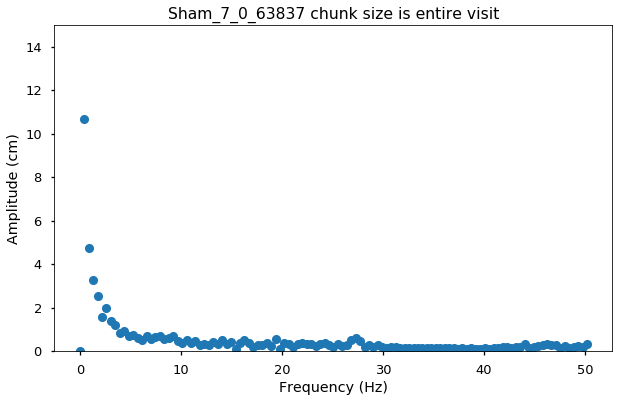

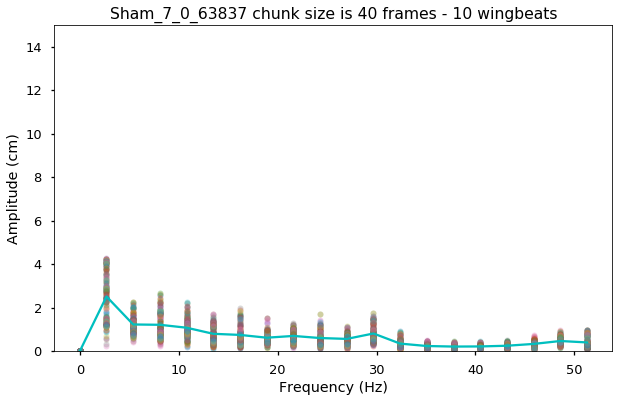

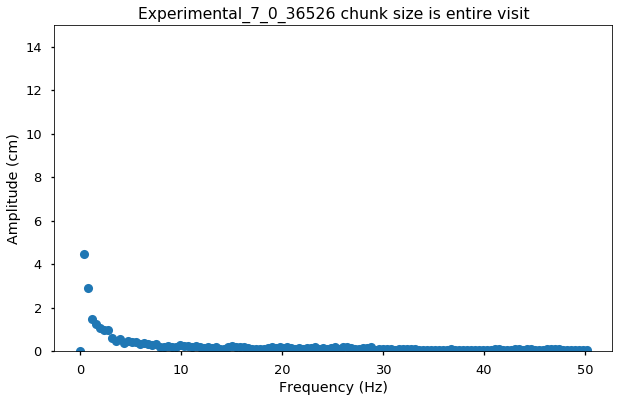

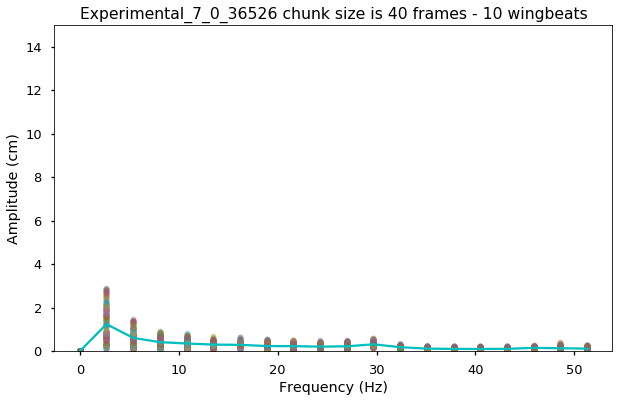

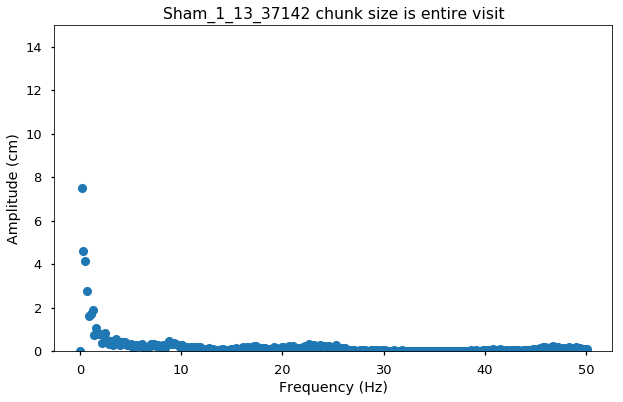

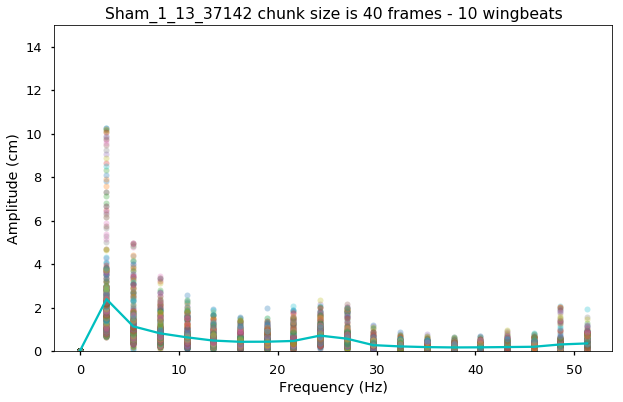

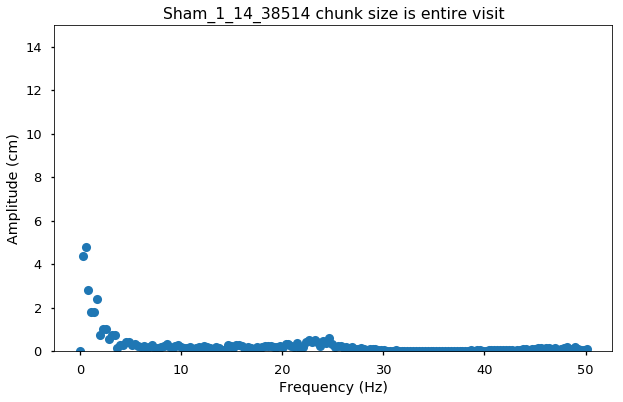

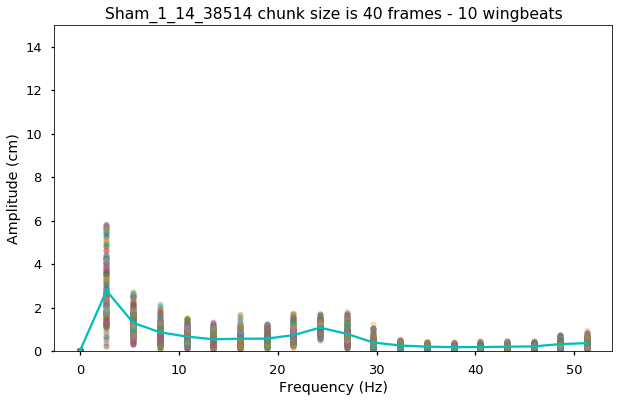

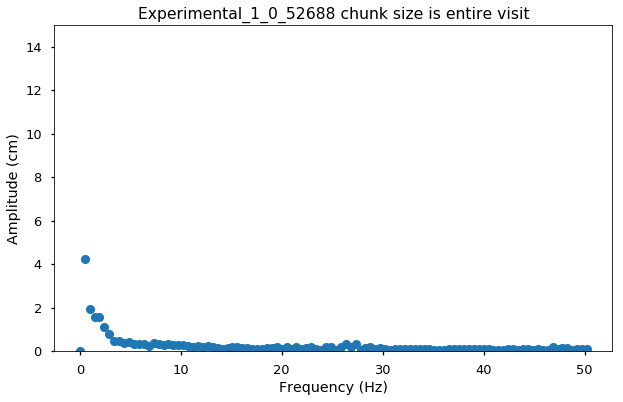

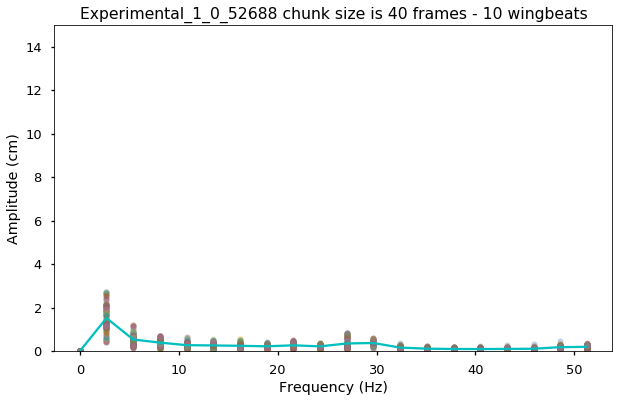

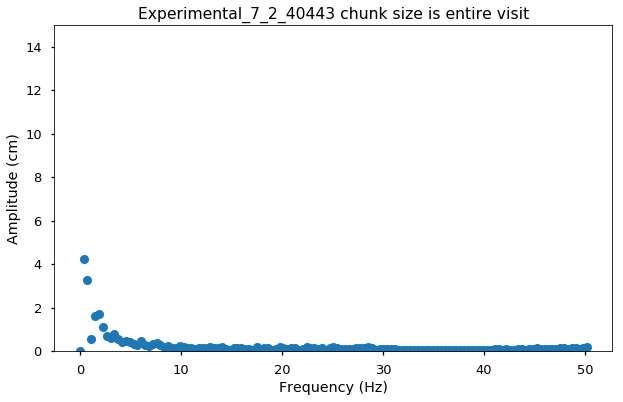

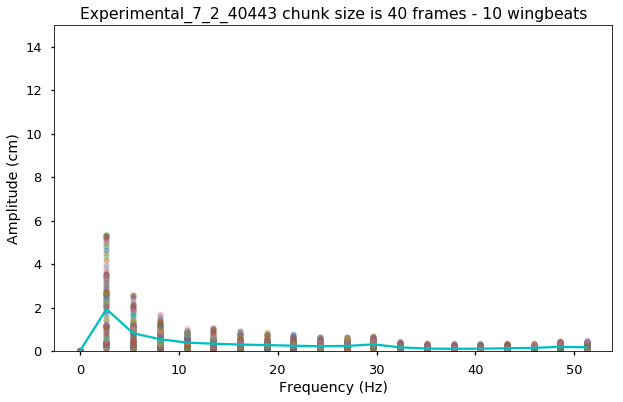

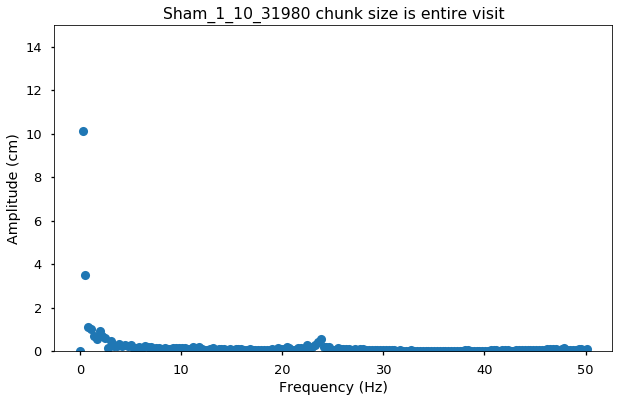

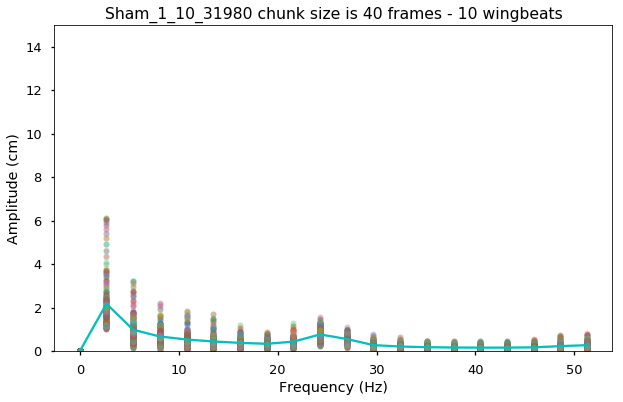

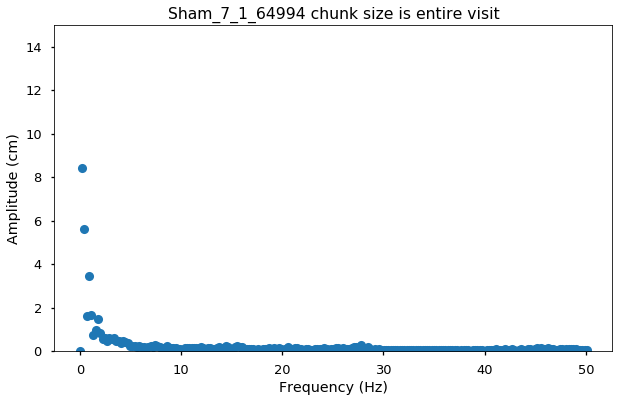

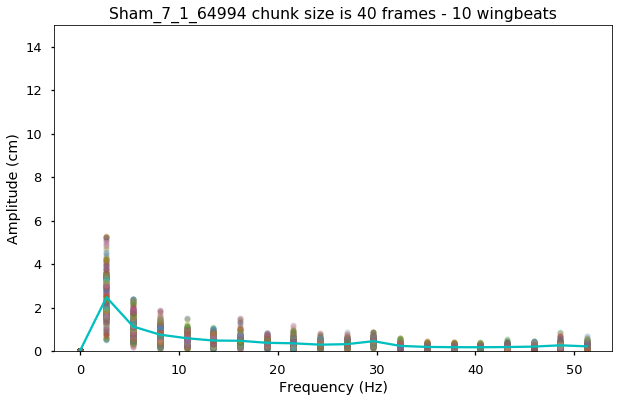

In [5]:
mean_list = []
std_list = []
visit_list = []
name_list = []
chunk = 40
for ele in csv_list:
    df = pd.read_csv(ele)
   
    visit = df.VisitNumber[0]
    visit_list.append(visit)
    x, y, time = df.X_position.values*2.5/75, df.Y_position.values*2.5/75, df.FrameNumber.values
    
    if ele[77:].startswith("Sham_1_10"):
        x,y, time = x[240:600], y[240:600], time[240:600]
    elif ele[77:].startswith("Sham_15_8"):
        x,y, time = x[400:600], y[400:600], time[400:600]
    elif ele[77:].startswith("Sham_6_0"):
        x,y, time = x[10:220], y[10:220], time[10:220]
    
    plt.figure(figsize=(10,6))
    
    
    x_, N_, fft_ = Tortuosity(x, time)
    y_, N__, fft__ = Tortuosity(y, time)
    sum_ = ((2.0/N__ * np.abs(fft__[0:N__//2])) + (2.0/N_ * np.abs(fft_[0:N_//2])))
    
    plt.title(ele[77:-4] + " chunk size is entire visit")
    plt.ylim(0,15)
    plt.ylabel("Amplitude (cm)")
    plt.xlabel("Frequency (Hz)")
    
    plt.plot(x_, sum_, "o")
    
    plt.savefig(r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Figures/Entire_" + ele[77:-4] + ".png")
    
    n = np.arange(0,len(x)-chunk,1)
    ratio_list = []
    plt.figure(figsize=(10,6))
    sum_count = chunk//2*[0]

    for element in n:


        shortest_path = np.sqrt((x[element+chunk]-x[element])**2 + (y[element+chunk]-y[element])**2)


        actual_list = 0
        i = 0
        while i < len(x[element:element+chunk]):



            actual_path = np.sqrt((x[element:element+chunk+1][i+1]-x[element:element+chunk+1][i])**2 + (y[element:element+chunk+1][i+1]-y[element:element+chunk+1][i])**2)
            actual_list += actual_path



            i +=1
        
        
        
        
    
        
        

        xf, Nx, fftx = Tortuosity(x[element:element+chunk], time[element:element+chunk])
        yf, Ny, ffty = Tortuosity(y[element:element+chunk], time[element:element+chunk])
        sum_xy = ((2.0/Ny * np.abs(ffty[0:Ny//2])) + (2.0/Nx * np.abs(fftx[0:Nx//2])))
        sum_count += sum_xy
        plt.title(ele[77:-4] + " chunk size is 40 frames - 10 wingbeats")
        plt.ylim(0,15)
        plt.ylabel("Amplitude (cm)")
        plt.xlabel("Frequency (Hz)")
        plt.plot(xf, sum_xy, "o", ms = 6, alpha = 0.3)
        
        ratio = actual_list/shortest_path
        ratio_list.append(ratio)
    plt.plot(xf, sum_count/(element+1), c = "c")
    name_list.append(ele[77:-4])
    mean = np.mean(ratio_list)
    std = np.std(ratio_list)
    mean_list.append(mean)
    std_list.append(std)
    if np.isfinite(mean):
        print(ele[77:-4], mean)
    plt.savefig(r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Figures/" + ele[77:-4] + ".png")


In [6]:
#feed this into the mixed effects model in R
name_list_ = []
for name in name_list:
    if name.startswith('Sham'):
        name = name[:7]
        if name.endswith('_'):
            name = name[:-1]
    elif name.startswith('Experimental'):
        name = name[:15]
        if name.endswith('_'):
            name = name[:-1]
    
    name_list_.append(name)
#     print(name)
name_list = name_list_

In [7]:
condition = []
for name in name_list:
    if name.startswith("Sham"):
        condition.append("Sham")
    else:
        condition.append("Experiment")
condition

['Sham',
 'Experiment',
 'Experiment',
 'Sham',
 'Sham',
 'Sham',
 'Experiment',
 'Sham',
 'Experiment',
 'Sham',
 'Experiment',
 'Sham',
 'Sham',
 'Experiment',
 'Experiment',
 'Sham',
 'Sham']

In [8]:
len(mean_list),len(std_list), len(name_list), len(visit_list)

(17, 17, 17, 17)

In [9]:
new_df = (pd.DataFrame({'name' : name_list, 
                        'std_tortuosity': std_list, 'mean_tortuosity' : mean_list,
                        'condition': condition, 'visit_number': visit_list}))
new_df = new_df.sort_values(by=['name','visit_number'])
new_df.reset_index(drop=True, inplace=True)

In [10]:
exp = new_df[new_df.condition == "Experiment"].mean_tortuosity.values
sham = new_df[new_df.condition == "Sham"].mean_tortuosity.values

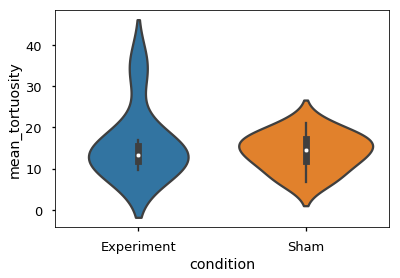

In [11]:
#need to add the original values to ground these comparisons
ax = sns.violinplot(x="condition", y="mean_tortuosity",
                    data=new_df)

In [12]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
stats.f_oneway(exp, sham)

F_onewayResult(statistic=0.3801760255695759, pvalue=0.546753840953262)

In [13]:
new_df

,condition,mean_tortuosity,name,std_tortuosity,visit_number
0,Experiment,12.163789,Experimental_1,8.695083,0
1,Experiment,34.622607,Experimental_4,38.460742,1
2,Experiment,9.682698,Experimental_7,10.787475,0
3,Experiment,16.919756,Experimental_7,48.038860,1
4,Experiment,13.182001,Experimental_7,22.329259,2
5,Experiment,13.863883,Experimental_7,18.163859,3
6,Experiment,11.598420,Experimental_7,21.095690,4
7,Sham,15.731015,Sham_1,39.499350,10
8,Sham,20.955578,Sham_1,30.626129,11
9,Sham,16.264498,Sham_1,19.995821,12
